## The dataset used in this analysis was obtained from the New York City Airbnb Open Data collection on Kaggle, originally compiled by Dmitry Gomonov (2019). It contains detailed listing information for Airbnb properties in New York City. The dataset was accessed via Kaggle at:
## https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

## STEP 1: Imports + Data Loading (Done by Saniya Shaikh)

In [ ]:


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [72]:


df = pd.read_csv("Data\\AB_NYC_2019.csv")

print(df.shape)
df.head()


(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [53]:
df_denoised = df.copy()

## STEP 2: Basic Data Inspection (Saniya Shaikh)

In [ ]:


df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## STEP 3: HANDLE MISSING VALUES (Done by Saniya Shaikh)

In [55]:
# Fill reviews_per_month with 0 where number_of_reviews == 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [56]:
df.drop(columns=['last_review'], inplace=True)


In [57]:
df['name'] = df['name'].fillna("Unknown")
df['host_name'] = df['host_name'].fillna("Unknown")


In [ ]:

print("Shape of dataset:", df.shape)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

df.head()


Shape of dataset: (48895, 15)

Missing values per column:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Data types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          objec

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [59]:
df.to_csv("AB_NYC_2019_basic_cleaned.csv", index=False)

## STEP 4: OUTLIER REMOVAL (RULE-BASED) (Done by Saniya Shaikh)

In [ ]:


# Remove price <= 0 or price > 1000
df = df[(df["price"] > 0) & (df["price"] <= 1000)]

# Remove unrealistic minimum_nights > 365
df = df[df["minimum_nights"] <= 365]

df.shape


(48631, 15)

## STEP 5: FEATURE ENGINEERING (Done by Saniya Shaikh)

In [ ]:

# 5.1 Price categories
def price_category(p):
    if p < 100:
        return "Budget"
    elif p <= 200:
        return "Mid-range"
    else:
        return "Luxury"

df["price_category"] = df["price"].apply(price_category)

# 5.2 Distance from Manhattan center (rough)
MAN_LAT = 40.7589
MAN_LON = -73.9851
df["dist_manhattan"] = np.sqrt(
    (df["latitude"] - MAN_LAT) ** 2 + (df["longitude"] - MAN_LON) ** 2
)

# 5.3 Price per night ratio
df["price_per_night"] = df["price"] / df["minimum_nights"]

# 5.4 Host experience: single vs multiple listing
df["host_experience"] = np.where(df["calculated_host_listings_count"] > 1, 1, 0)

# 5.5 Review activity level
def review_activity(n):
    if n == 0:
        return "None"
    elif n < 10:
        return "Low"
    elif n < 50:
        return "Medium"
    else:
        return "High"

df["review_activity"] = df["number_of_reviews"].apply(review_activity)


## STEP 6: Encoding Categorical Features (Done by Saniya)

In [ ]:


# One-hot encode neighbourhood_group and room_type
df = pd.get_dummies(
    df,
    columns=["neighbourhood_group", "room_type"],
    drop_first=True
)

# Label encode neighbourhood (many categories)
le_neigh = LabelEncoder()
df["neighbourhood_encoded"] = le_neigh.fit_transform(df["neighbourhood"])


## STEP 7: NOISE INJECTION (Done by Saniya)

In [ ]:


df_noisy = df.copy()

# 7.1 Add Gaussian noise to price (mean=0, std=0.15 * price_std)
price_std = df_noisy["price"].std()
noise = np.random.normal(loc=0, scale=0.15 * price_std, size=len(df_noisy))
df_noisy["price_noisy"] = df_noisy["price"] + noise
df_noisy["price_noisy"] = df_noisy["price_noisy"].clip(lower=1)  # avoid <=0

# 7.2 Add outliers to latitude/longitude for 5% of rows
n_outliers = int(0.05 * len(df_noisy))
outlier_idx = np.random.choice(df_noisy.index, size=n_outliers, replace=False)

df_noisy.loc[outlier_idx, "latitude"] += 0.5
df_noisy.loc[outlier_idx, "longitude"] += 0.5


## STEP 8: NOISE CLEANING & OUTLIER HANDLING (Done by Saniya)

In [ ]:


# 8.1 Remove price outliers in noisy price using IQR
Q1 = df_noisy["price_noisy"].quantile(0.25)
Q3 = df_noisy["price_noisy"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_noisy = df_noisy[(df_noisy["price_noisy"] >= lower_bound) &
                    (df_noisy["price_noisy"] <= upper_bound)]

# 8.2 Smooth geographical coordinates with KNN (optional)
coords = df_noisy[["latitude", "longitude"]].values
nbrs = NearestNeighbors(n_neighbors=5).fit(coords)
distances, indices = nbrs.kneighbors(coords)

lat_smoothed = []
lon_smoothed = []

for idx_list in indices:
    lat_smoothed.append(coords[idx_list, 0].mean())
    lon_smoothed.append(coords[idx_list, 1].mean())

df_noisy["latitude_smooth"] = lat_smoothed
df_noisy["longitude_smooth"] = lon_smoothed

# 8.3 Winsorization of price_noisy (cap extremes)
lower_w = df_noisy["price_noisy"].quantile(0.01)
upper_w = df_noisy["price_noisy"].quantile(0.99)
df_noisy["price_clean"] = df_noisy["price_noisy"].clip(lower=lower_w, upper=upper_w)


In [67]:
df.to_csv("AB_NYC_2019_denoised_cleaned.csv", index=False)

## STEP 9: Comparison Plots (Done by Saniya)

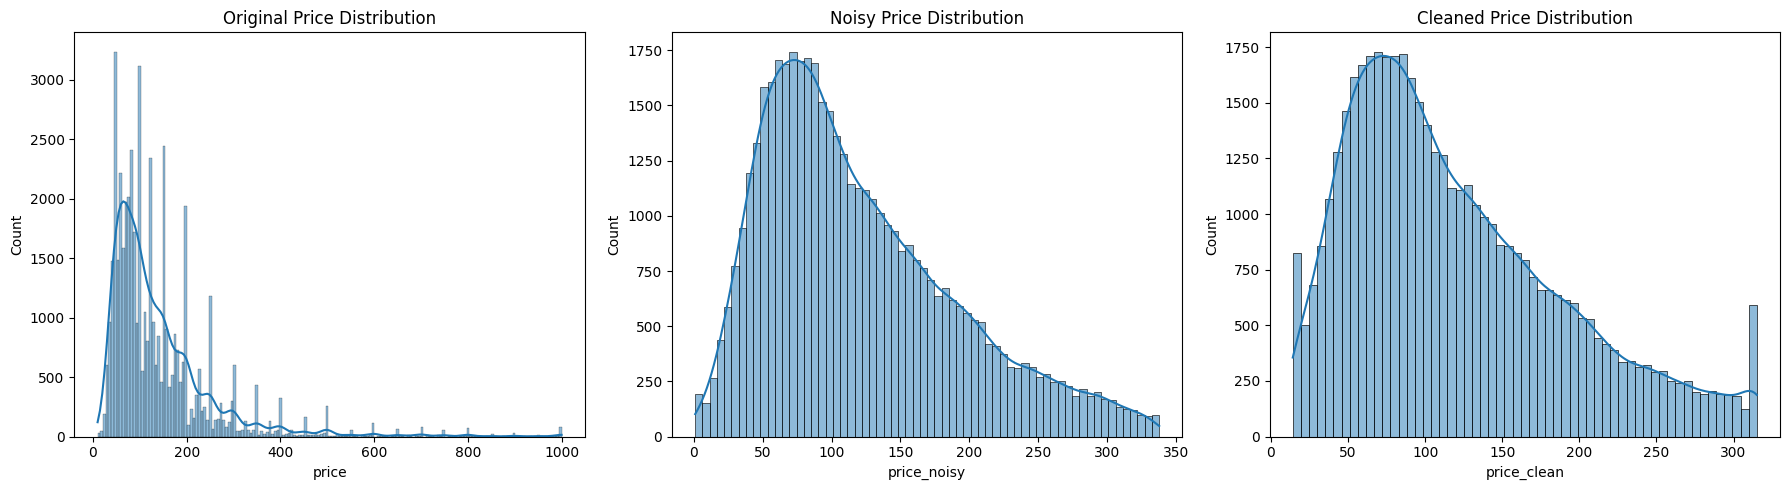

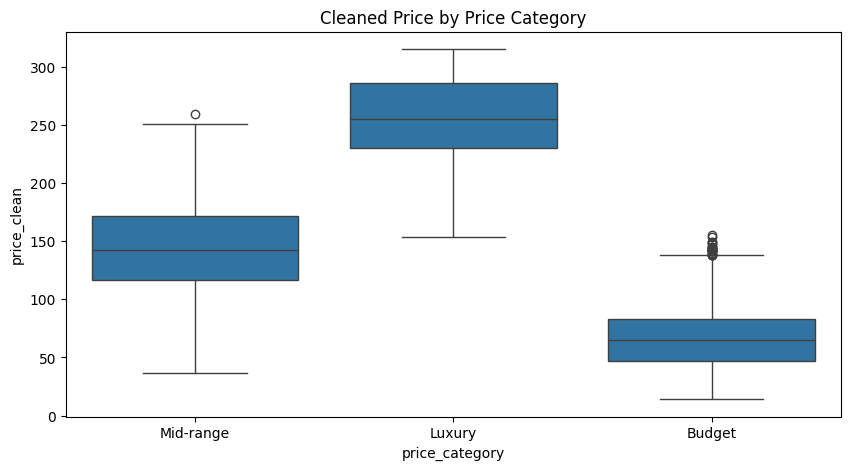

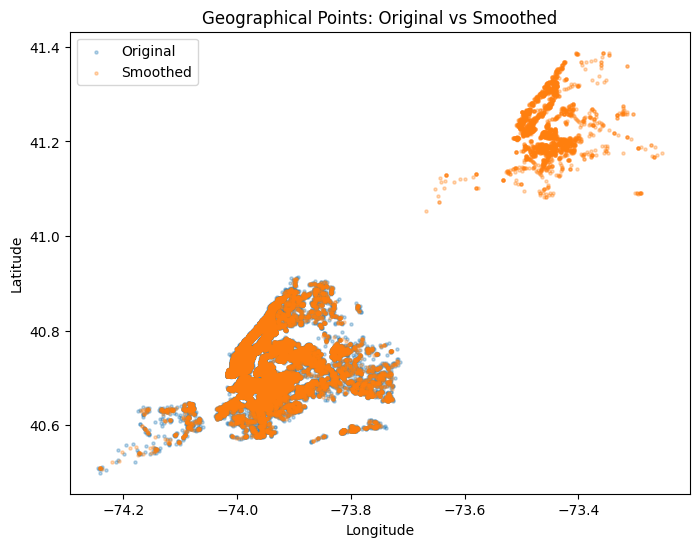

In [ ]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original price
sns.histplot(df["price"], kde=True, ax=axes[0])
axes[0].set_title("Original Price Distribution")

# Noisy price
sns.histplot(df_noisy["price_noisy"], kde=True, ax=axes[1])
axes[1].set_title("Noisy Price Distribution")

# Cleaned price
sns.histplot(df_noisy["price_clean"], kde=True, ax=axes[2])
axes[2].set_title("Cleaned Price Distribution")

plt.tight_layout()
plt.show()

# Boxplot: price across room_types (noisy vs cleaned)
plt.figure(figsize=(10, 5))
sns.boxplot(x="price_category", y="price_clean", data=df_noisy)
plt.title("Cleaned Price by Price Category")
plt.show()

# Scatter: lat/long showing outlier detection (before smoothing)
plt.figure(figsize=(8, 6))
plt.scatter(df["longitude"], df["latitude"], s=5, alpha=0.3, label="Original")
plt.scatter(df_noisy["longitude_smooth"], df_noisy["latitude_smooth"],
            s=5, alpha=0.3, label="Smoothed")
plt.legend()
plt.title("Geographical Points: Original vs Smoothed")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## STEP 10: FEATURE SCALING (Done by Saniya)

In [ ]:

scaler = StandardScaler()

numeric_cols = [
    "price_clean",
    "latitude_smooth",
    "longitude_smooth",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "dist_manhattan",
    "price_per_night"
]

df_scaled = df_noisy.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,neighbourhood_encoded,price_noisy,latitude_smooth,longitude_smooth,price_clean
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,-0.359772,-0.329591,...,False,False,False,True,False,108,112.028075,-0.866445,-0.397125,-0.116385
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,-0.359772,0.465305,...,True,False,False,False,False,127,193.487241,-0.000019,-0.499667,1.045497
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,41.30902,-73.44190,150,-0.234683,-0.528315,...,True,False,False,True,False,94,153.677907,4.554859,4.110228,0.477682
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,-0.359772,5.433408,...,False,False,False,False,False,41,50.021063,-0.557087,-0.288192,-1.000814
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,0.203128,-0.329591,...,True,False,False,False,False,61,117.465482,0.370430,-0.153033,-0.038830
